### Essential Libraries

In [1]:
!pip install --upgrade pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/b1/67/aca1f6e215d957d24d0a290321f368503305480268f9617bf625243e9dea/pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.12.3 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyterlab~=3.4, but you have jupyterlab 4.0.10 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires sh

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

### Importing Dataframes

In [3]:
df = pd.read_csv("/kaggle/input/world-population-growth/world-country-populations.csv")
df1 = pd.read_csv("/kaggle/input/mapping-of-features-world-pop/ContinentsB.csv", index_col = 0)
df2 = pd.read_csv("/kaggle/input/mapping-of-features-world-pop/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_6298258.csv")

#### Feature Engineering, Data Cleaning & Dataset Merging

In [4]:
df.rename(columns={"population_in_2023": "Population (2023)", "population_in_2022": "Population (2022)", "city": "City", "country": "Country","population_growthRate": "Population Growth Rate", "type": "Type" }, inplace =True)
df = df.reindex(columns=['City', 'Country', 'Population (2022)', 'Population (2023)', 'Population Growth Rate'])
#df.drop(columns=['Type'], inplace=True)

# List of abbreviations to replace
abbreviations_to_replace = ['NY', 'CA', 'IL', 'TX', 'AZ', 'PA', 'FL', 'OH', 'NC', 'IN']
# Replace the specified entries with "United States"
df['Country'] = df['Country'].replace(abbreviations_to_replace, 'United States')
# uppercase everything in Type Column
#df['Type'] = df['Type'].str.upper()

In [5]:
df

,City,Country,Population (2022),Population (2023),Population Growth Rate
0,Tokyo,Japan,37274002,37194105,-0.0021
1,Delhi,India,32065760,32941309,0.0273
2,Shanghai,China,28516903,29210808,0.0243
3,Dhaka,Bangladesh,22478117,23209616,0.0325
4,Sao Paulo,Brazil,22429799,22619736,0.0085
...,...,...,...,...,...
773,Tongling,China,734805,752916,0.0246
774,Tirupati,India,729109,752744,0.0324
775,Wuzhou,China,733917,751679,0.0242
776,Yuxi,China,723114,750102,0.0373


In [6]:
df1.rename(columns={"name": "Country", "region": "Continent", "sub-region": "Sub-Region"}, inplace =True)
df1.set_index('Country')
df1
# renaming columns and index set

,Country,Continent,Sub-Region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia
245,Western Sahara,Africa,Northern Africa
246,Yemen,Asia,Western Asia
247,Zambia,Africa,Sub-Saharan Africa


In [7]:
df2.rename(columns={"TableName": "Country", "Region": "Sub-Region", "IncomeGroup": "Income Group"}, inplace =True)
df2.drop(columns=['Unnamed: 5', 'SpecialNotes'], inplace=True)
df2
# renaming columns, dropping columns

,Country Code,Sub-Region,Income Group,Country
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFE,NaN,NaN,Africa Eastern and Southern
2,AFG,South Asia,Low income,Afghanistan
3,AFW,NaN,NaN,Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,Angola
...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,Kosovo
261,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
262,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
263,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


In [8]:
# Create an empty DataFrame to store the result
result_df = pd.DataFrame()

# Loop through each country in df1
for index, row_df in df.iterrows():
    country = row_df['Country']

    # Find the corresponding row in df
    match_df1 = df1[df1['Country'] == country]

    # Find the corresponding row in df based on Sub-Region
    match_df2 = df2[df2['Country'] == country]

    # If there is a match in both df2 and df3, join the rows and append to the result DataFrame
    if not match_df1.empty and not match_df2.empty:
        result_row = pd.concat([row_df, match_df1.iloc[0], match_df2.iloc[0]], axis=0)  # Concatenate along rows
        result_df = pd.concat([result_df, result_row], axis=1, ignore_index=True)  # Concatenate along columns

# Transpose the result DataFrame to have countries as rows and variables as columns
result_df = result_df.T

# Print the result DataFrame
result_df


,City,Country,Population (2022),Population (2023),Population Growth Rate,Country,Continent,Sub-Region,Country Code,Sub-Region,Income Group,Country
0,Tokyo,Japan,37274002,37194105,-0.0021,Japan,Asia,Eastern Asia,JPN,East Asia & Pacific,High income,Japan
1,Delhi,India,32065760,32941309,0.0273,India,Asia,Southern Asia,IND,South Asia,Lower middle income,India
2,Shanghai,China,28516903,29210808,0.0243,China,Asia,Eastern Asia,CHN,East Asia & Pacific,Upper middle income,China
3,Dhaka,Bangladesh,22478117,23209616,0.0325,Bangladesh,Asia,Southern Asia,BGD,South Asia,Lower middle income,Bangladesh
4,Sao Paulo,Brazil,22429799,22619736,0.0085,Brazil,Americas,Latin America and the Caribbean,BRA,Latin America & Caribbean,Upper middle income,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...
671,Tongling,China,734805,752916,0.0246,China,Asia,Eastern Asia,CHN,East Asia & Pacific,Upper middle income,China
672,Tirupati,India,729109,752744,0.0324,India,Asia,Southern Asia,IND,South Asia,Lower middle income,India
673,Wuzhou,China,733917,751679,0.0242,China,Asia,Eastern Asia,CHN,East Asia & Pacific,Upper middle income,China
674,Yuxi,China,723114,750102,0.0373,China,Asia,Eastern Asia,CHN,East Asia & Pacific,Upper middle income,China


In [9]:
result_df = result_df.loc[:,~result_df.columns.duplicated()].copy() # pandas remove duplicate columns

#### Final Cleaned Data

In [10]:
result_df = result_df.reindex(columns=['City', 'Country', 'Country Code','Continent', 'Sub-Region', 'Income Group', 'Population (2022)', 'Population (2023)', 'Population Growth Rate'])# final
result_df

,City,Country,Country Code,Continent,Sub-Region,Income Group,Population (2022),Population (2023),Population Growth Rate
0,Tokyo,Japan,JPN,Asia,Eastern Asia,High income,37274002,37194105,-0.0021
1,Delhi,India,IND,Asia,Southern Asia,Lower middle income,32065760,32941309,0.0273
2,Shanghai,China,CHN,Asia,Eastern Asia,Upper middle income,28516903,29210808,0.0243
3,Dhaka,Bangladesh,BGD,Asia,Southern Asia,Lower middle income,22478117,23209616,0.0325
4,Sao Paulo,Brazil,BRA,Americas,Latin America and the Caribbean,Upper middle income,22429799,22619736,0.0085
...,...,...,...,...,...,...,...,...,...
671,Tongling,China,CHN,Asia,Eastern Asia,Upper middle income,734805,752916,0.0246
672,Tirupati,India,IND,Asia,Southern Asia,Lower middle income,729109,752744,0.0324
673,Wuzhou,China,CHN,Asia,Eastern Asia,Upper middle income,733917,751679,0.0242
674,Yuxi,China,CHN,Asia,Eastern Asia,Upper middle income,723114,750102,0.0373


#### Converting the numerical data that were objects in numerical data **Very important code**

In [11]:
for column in result_df.columns:
    if 'Population' in column:
        # Check if the column name contains 'Population'
        if column.endswith('(2022)') or column.endswith('(2023)'):
            # Convert Population columns to ints
            result_df[column] = result_df[column].astype(int)
        elif column == 'Population Growth Rate':
            # Convert Population Growth Rate column to floats
            result_df[column] = result_df[column].astype(float)

#### Exploring the final Data

In [12]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    676 non-null    object 
 1   Country                 676 non-null    object 
 2   Country Code            676 non-null    object 
 3   Continent               676 non-null    object 
 4   Sub-Region              676 non-null    object 
 5   Income Group            676 non-null    object 
 6   Population (2022)       676 non-null    int64  
 7   Population (2023)       676 non-null    int64  
 8   Population Growth Rate  676 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 47.7+ KB


In [13]:
result_df.describe()

,Population (2022),Population (2023),Population Growth Rate
count,6.760000e+02,6.760000e+02,676.000000
mean,2.610634e+06,2.662642e+06,0.021352
std,3.675580e+06,3.736502e+06,0.012737
min,7.231140e+05,7.500970e+05,-0.034800
25%,9.586718e+05,9.832082e+05,0.013575
50%,1.368303e+06,1.390517e+06,0.020850
75%,2.574225e+06,2.608940e+06,0.028725
max,3.727400e+07,3.719410e+07,0.061100


In [14]:
result_df.isnull().sum()

City                      0
Country                   0
Country Code              0
Continent                 0
Sub-Region                0
Income Group              0
Population (2022)         0
Population (2023)         0
Population Growth Rate    0
dtype: int64

### EDA

In [15]:
# Visualize Population Distribution by Sub-Region
fig1 = px.bar(result_df, x='City', y='Population (2022)',
              color='Continent',
              title='Population Distribution by City in 2022',
              labels={'Population (2022)': 'Population'})
fig1.show()

In [16]:
fig2 = px.bar(result_df, x='City', y='Population (2023)',
              color='Sub-Region',
              title='Population Distribution by Sub-Region in 2023',
              labels={'Population (2023)': 'Population'})
fig2.show()

In [17]:
# Visualize Population Growth Rate
fig3 = px.bar(result_df, x='City', y='Population Growth Rate',
              title='Population Growth Rate 2022 vs 2023 in Cities',
              color = 'Continent',
              labels={'Population Growth Rate': 'Growth Rate'})
fig3.show()

In [18]:
top_pop = result_df.sort_values(by = 'Population (2023)', ascending = False).head(10)
top_pop[['City','Continent', 'Sub-Region','Population (2023)']] # top 10 countires wiht the most population in 2023

,City,Continent,Sub-Region,Population (2023)
0,Tokyo,Asia,Eastern Asia,37194105
1,Delhi,Asia,Southern Asia,32941309
2,Shanghai,Asia,Eastern Asia,29210808
3,Dhaka,Asia,Southern Asia,23209616
4,Sao Paulo,Americas,Latin America and the Caribbean,22619736
5,Mexico City,Americas,Latin America and the Caribbean,22281442
6,Beijing,Asia,Eastern Asia,21766214
7,Mumbai,Asia,Southern Asia,21296517
8,Osaka,Asia,Eastern Asia,19013434
9,Chongqing,Asia,Eastern Asia,17340704


In [19]:
fig4 = px.bar(top_pop, x='City', y='Population (2023)',
              color='Continent', facet_col='Sub-Region',
              title='Top 10 populous Cities in 2023',
              labels={'Population (2023)': 'Population'})
fig4.show()

In [20]:
less_pop = result_df.sort_values(by = 'Population (2023)', ascending = True).head(10)
less_pop[['City','Continent', 'Sub-Region','Population (2023)']]

,City,Continent,Sub-Region,Population (2023)
675,Suining Sichuan,Asia,Eastern Asia,750097
674,Yuxi,Asia,Eastern Asia,750102
673,Wuzhou,Asia,Eastern Asia,751679
672,Tirupati,Asia,Southern Asia,752744
671,Tongling,Asia,Eastern Asia,752916
670,Sialkot,Asia,Southern Asia,753325
669,Yuncheng,Asia,Eastern Asia,754711
668,Tongliao,Asia,Eastern Asia,756158
667,Yanji,Asia,Eastern Asia,757224
666,Dengzhou,Asia,Eastern Asia,759150


In [21]:
fig5 = px.bar(less_pop, x='City', y='Population (2023)',
              color='Continent', facet_col='Sub-Region',
              title='Top 10 least populous Cities in 2023',
              labels={'Population (2023)': 'Population'})
fig5.show()

In [22]:
fig6 = go.Figure(data=go.Choropleth(
    locations=result_df['Country'],
    z = result_df['Population Growth Rate'],
    locationmode = 'country names',
    colorscale = 'jet',
    colorbar_title = "Growth Rate",
))

fig6.update_layout(
    title = dict(text = '<b>Countries Population Growth Rate. 2022 vs 2023</b>',
    x = 0.5)
)

fig6.show()

In [23]:
# Sort the DataFrame by Population (2023) in descending order
sorted_df = result_df.sort_values(by='Population (2023)', ascending=False)

# Create an empty list to store DataFrames for each continent
dfs_by_continent = []

# Iterate over each continent
for continent in result_df['Continent'].unique():
    # Get the top 5 countries for each continent
    top_countries = sorted_df[sorted_df['Continent'] == continent].nlargest(5, 'Population (2023)')

    # Append the top countries DataFrame to the list
    dfs_by_continent.append(top_countries)

# Concatenate the DataFrames from the list into a single DataFrame
top_countries_by_continent = pd.concat(dfs_by_continent, ignore_index=True)

# Display the result
top_countries_by_continent


,City,Country,Country Code,Continent,Sub-Region,Income Group,Population (2022),Population (2023),Population Growth Rate
0,Tokyo,Japan,JPN,Asia,Eastern Asia,High income,37274002,37194105,-0.0021
1,Delhi,India,IND,Asia,Southern Asia,Lower middle income,32065760,32941309,0.0273
2,Shanghai,China,CHN,Asia,Eastern Asia,Upper middle income,28516903,29210808,0.0243
3,Dhaka,Bangladesh,BGD,Asia,Southern Asia,Lower middle income,22478117,23209616,0.0325
4,Beijing,China,CHN,Asia,Eastern Asia,Upper middle income,21333331,21766214,0.0203
5,Sao Paulo,Brazil,BRA,Americas,Latin America and the Caribbean,Upper middle income,22429799,22619736,0.0085
6,Mexico City,Mexico,MEX,Americas,Latin America and the Caribbean,Upper middle income,22085139,22281442,0.0089
7,Buenos Aires,Argentina,ARG,Americas,Latin America and the Caribbean,Upper middle income,15369919,15490415,0.0078
8,Rio de Janeiro,Brazil,BRA,Americas,Latin America and the Caribbean,Upper middle income,13634274,13727720,0.0069
9,Bogota,Colombia,COL,Americas,Latin America and the Caribbean,Upper middle income,11344312,11507960,0.0144


In [24]:
fig7 = px.bar(top_countries_by_continent, x='City', y='Population (2023)',
             color='Country', facet_col='Continent',
             title='Top 5 Cities with Highest Population for Each Continent',
             labels={'Population (2023)': 'Population'})

# Update layout for better visualization
fig7.update_layout(showlegend=False, height=800, title_x=0.5)

# Show the plot
fig7.show()

In [25]:
# Create an empty list to store DataFrames for each continent
dfs_bottom_by_continent = []

# Iterate over each continent
for continent in result_df['Continent'].unique():
    # Get the bottom 5 countries for each continent
    bottom_countries = sorted_df[sorted_df['Continent'] == continent].nsmallest(5, 'Population (2023)')

    # Append the bottom countries DataFrame to the list
    dfs_bottom_by_continent.append(bottom_countries)

# Concatenate the DataFrames from the list into a single DataFrame
bottom_countries_by_continent = pd.concat(dfs_bottom_by_continent, ignore_index=True)

# Display the result
bottom_countries_by_continent


,City,Country,Country Code,Continent,Sub-Region,Income Group,Population (2022),Population (2023),Population Growth Rate
0,Suining Sichuan,China,CHN,Asia,Eastern Asia,Upper middle income,733643,750097,0.0224
1,Yuxi,China,CHN,Asia,Eastern Asia,Upper middle income,723114,750102,0.0373
2,Wuzhou,China,CHN,Asia,Eastern Asia,Upper middle income,733917,751679,0.0242
3,Tirupati,India,IND,Asia,Southern Asia,Lower middle income,729109,752744,0.0324
4,Tongling,China,CHN,Asia,Eastern Asia,Upper middle income,734805,752916,0.0246
5,Hamilton,Canada,CAN,Americas,Northern America,High income,775751,781047,0.0068
6,Xalapa,Mexico,MEX,Americas,Latin America and the Caribbean,Upper middle income,799178,811041,0.0148
7,Sorocaba,Brazil,BRA,Americas,Latin America and the Caribbean,Upper middle income,804692,813320,0.0107
8,Winnipeg,Canada,CAN,Americas,Northern America,High income,832944,841108,0.0098
9,Quebec City,Canada,CAN,Americas,Northern America,High income,837814,844249,0.0077


In [26]:
# Bar chart for Bottom 5 Countries with Lowest Population for Each Continent
fig8 = px.bar(bottom_countries_by_continent, x='City', y='Population (2023)',
             color='Country', facet_col='Continent',
             title='Bottom 5 City with Lowest Population for Each Continent',
             labels={'Population (2023)': 'Population'})

# Update layout for better visualization
fig8.update_layout(showlegend=False, height=800, title_x=0.5)

# Show the plot
fig8.show()

In [27]:
by_continent = result_df.groupby('Sub-Region').sum().sort_values(by = 'Population (2023)',ascending = True)
cont_gr = by_continent[['Population Growth Rate']].sort_values(by = 'Population Growth Rate',ascending = True)
#cont_gr

In [28]:
# Create a horizontal bar chart
fig9 = px.bar(cont_gr, x='Population Growth Rate', y=cont_gr.index,
             orientation='h',
            color= 'Population Growth Rate',
             title='Population Growth Rate by Sub-Region',
             labels={'Population Growth Rate': 'Population Growth Rate'},
             width=800, height=600)

# Show the plot
fig9.show()

In [29]:
# Group by 'Income Group', sum the values, and sort by 'Population (2023)'
by_income_group = result_df.groupby('Income Group').sum().sort_values(by='Population (2023)', ascending=True)

# Extract the 'Population Growth Rate' for better visualization
income_group_growth_rate = by_income_group[['Population Growth Rate']].sort_values(by='Population Growth Rate', ascending=True)
#income_group_growth_rate

In [30]:
# Create a bar chart for Population Growth Rate by Income Group using Plotly Express
fig11 = px.bar(income_group_growth_rate, x='Population Growth Rate', orientation='h',
             title='Population Growth Rate by Income Group',
             labels={'Population Growth Rate': 'Total Population Growth Rate'},
            )

# Show the plot
fig11.show()

In [31]:
# Create a scatter plot using Plotly Express
fig10 = px.scatter(result_df, x='Income Group', y='Population (2022)',
                 color='Sub-Region', size='Population (2023)',
                 title='Income Group vs Population (2022)',
                 labels={'Population (2022)': 'Population (2022)',
                         'Population (2023)': 'Population (2023)'},
                 hover_name='Country',
                )

# Show the plot
fig10.show()

### Machine Learning: Clustering

#### prerequisties

In [32]:
encoded_df = result_df.copy()

In [33]:
from sklearn.preprocessing import LabelEncoder


# Categorical boolean mask
categorical_feature_mask = encoded_df.dtypes == object

# Filter categorical columns using mask and turn it into a list
categorical_cols = encoded_df.columns[categorical_feature_mask].tolist()

# Instantiate label encoder object
label_encoder = LabelEncoder()

# Apply label encoding and store mappings
for col in categorical_cols:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])
    mapping_df = pd.DataFrame({
        'Original_Label': label_encoder.classes_,
        'Encoded_Label': range(len(label_encoder.classes_))
    })

    # Display the mapping
    #print(f"{col} Mapping:")
    #print(mapping_df) use the too codes above to display here

    # Save the mapping DataFrame as a CSV file
    #mapping_df.to_csv(f"/content/drive/MyDrive/{col}_mapping.csv", index=False)
     # use this code to load up save the df

In [34]:
conmap = pd.read_csv('/kaggle/input/mapping-of-features-world-pop/Continent_mapping.csv')
conmap

,Original_Label,Encoded_Label
0,Africa,0
1,Americas,1
2,Asia,2
3,Europe,3
4,Oceania,4


In [35]:
citmap = pd.read_csv('/kaggle/input/mapping-of-features-world-pop/City_mapping.csv')
citmap

,Original_Label,Encoded_Label
0,Aba,0
1,Abomey-Calavi,1
2,Abu Dhabi,2
3,Abuja,3
4,Acapulco de Juarez,4
...,...,...
668,Zhuzhou,668
669,Zibo,669
670,Zigong,670
671,Zunyi,671


In [36]:
counmap = pd.read_csv('/kaggle/input/mapping-of-features-world-pop/Country_mapping.csv')
counmap

,Original_Label,Encoded_Label
0,Afghanistan,0
1,Algeria,1
2,Angola,2
3,Argentina,3
4,Armenia,4
...,...,...
109,United States,109
110,Uruguay,110
111,Uzbekistan,111
112,Zambia,112


In [37]:
councomap = pd.read_csv('/kaggle/input/mapping-of-features-world-pop/Country Code_mapping (1).csv')
councomap

,Original_Label,Encoded_Label
0,AFG,0
1,AGO,1
2,ARE,2
3,ARG,3
4,ARM,4
...,...,...
109,USA,109
110,UZB,110
111,ZAF,111
112,ZMB,112


In [38]:
subrmap = pd.read_csv('/kaggle/input/mapping-of-features-world-pop/Sub-Region_mapping.csv')
subrmap

,Original_Label,Encoded_Label
0,Australia and New Zealand,0
1,Central Asia,1
2,Eastern Asia,2
3,Eastern Europe,3
4,Latin America and the Caribbean,4
5,Northern Africa,5
6,Northern America,6
7,Northern Europe,7
8,South-eastern Asia,8
9,Southern Asia,9


In [39]:
incmap = pd.read_csv('/kaggle/input/mapping-of-features-world-pop/Income Group_mapping.csv')
incmap

,Original_Label,Encoded_Label
0,High income,0
1,Low income,1
2,Lower middle income,2
3,Upper middle income,3


In [40]:
encoded_df

,City,Country,Country Code,Continent,Sub-Region,Income Group,Population (2022),Population (2023),Population Growth Rate
0,576,51,53,2,2,0,37274002,37194105,-0.0021
1,155,45,47,2,9,2,32065760,32941309,0.0273
2,517,23,21,2,2,3,28516903,29210808,0.0243
3,161,8,12,2,9,2,22478117,23209616,0.0325
4,512,13,16,1,4,3,22429799,22619736,0.0085
...,...,...,...,...,...,...,...,...,...
671,579,23,21,2,2,3,734805,752916,0.0246
672,574,45,47,2,9,2,729109,752744,0.0324
673,615,23,21,2,2,3,733917,751679,0.0242
674,652,23,21,2,2,3,723114,750102,0.0373


#### Clustering with MatPlotLib

In [41]:
features = ['Population Growth Rate', 'Income Group'] # here you can add any many features as you want, depending on what you want to do.

In [42]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
encoded_df_scaled = scaler.fit_transform(encoded_df[features])

In [43]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(encoded_df_scaled)
    wcss.append(kmeans.inertia_)

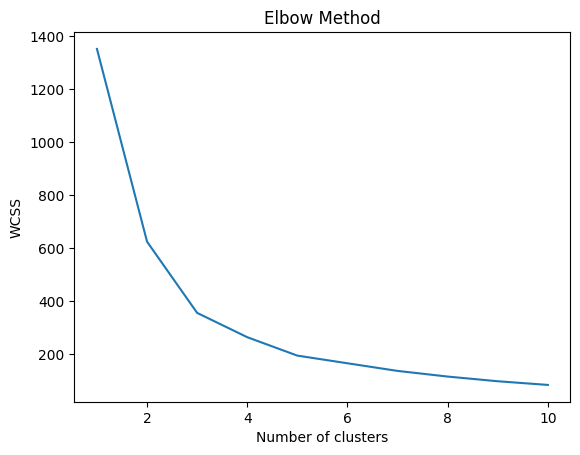

In [44]:
# Plot the elbow curve to select K
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
# Choose the optimal number of clusters based on the elbow curve
k = 5  # Adjust this value based on the plot and your domain knowledge

In [46]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
encoded_df['Cluster'] = kmeans.fit_predict(encoded_df_scaled)

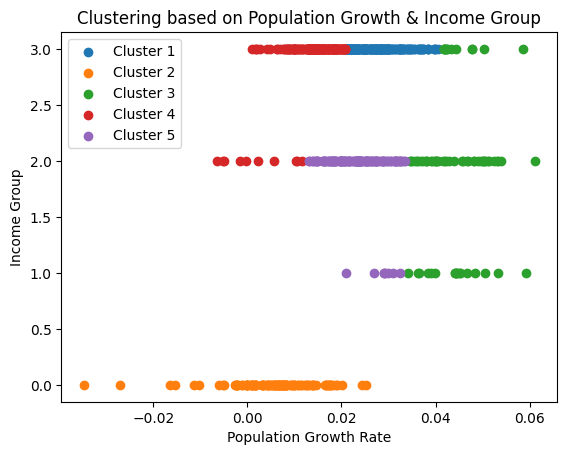

In [47]:
# Visualize the clusters
for i in range(k):
    cluster_data = encoded_df[encoded_df['Cluster'] == i]
    plt.scatter(cluster_data['Population Growth Rate'], cluster_data['Income Group'], label=f'Cluster {i + 1}')

plt.title('Clustering based on Population Growth & Income Group')
plt.xlabel('Population Growth Rate')
plt.ylabel('Income Group')
plt.legend()
plt.show()

#### Clustering with Plotly

In [48]:
selected_columns = ['Sub-Region', 'Population Growth Rate']

In [49]:
X = encoded_df[selected_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Step 3: Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters as needed
encoded_df['Cluster'] = kmeans.fit_predict(X_scaled)

In [51]:
fig = px.scatter(encoded_df, x='Population Growth Rate', y='Income Group', color='Cluster',
                 title='Clustering based on Income Group and Population Growth Rate',
                 labels={'Population Growth Rate': 'Population Growth Rate'},
                 hover_data={'City': True, 'Country': True, 'Population (2022)': True, 'Population (2023)': True,})

# Customize the cluster names if needed
cluster_names = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}
encoded_df['Cluster Name'] = encoded_df['Cluster'].map(cluster_names)



# Show the plot
fig.show()